# Spectractor Launcher

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : March 29th 2018


In [89]:
theNotebook="Run_Spectractor"

# Spectractor Launcher

In [90]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [91]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [92]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [94]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

In [95]:
#sys.path.append("../common_tools/")
#from common_notebook import *
#init_notebook()

## Spectractor 

In [96]:
PATH_SPECTRACTOR='../../Spectractor'

In [97]:
sys.path.append(PATH_SPECTRACTOR)

In [98]:
from spectractor import *

# Configuration

## Input Directory

### HD111980 is missing in logbook

In [99]:
if 0:
    inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
    MIN_IMGNUMBER=58
    #MAX_IMGNUMBER=80  # temporary
    MAX_IMGNUMBER=190
    date="20170530"
    object_name='HD111980'
    tag = "reduc"
    SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
    SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
    NBIMGPERROW=2
    subdir=os.path.basename(inputdir)

### So use HD205905

In [100]:
inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
MIN_IMGNUMBER=208
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2
subdir=os.path.basename(inputdir)

# Output directory

In [101]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory
outputdir="./spectra"
#ensure_dir(outputdir)

In [102]:
#infile_fullpath=os.path.join(PATH_SPECTRACTOR,infile)

In [103]:
sys.path.append(PATH_SPECTRACTOR)

In [104]:
from spectractor import *

# Logbook

In [105]:
file_logbook_csv='../common_info/ctiofulllogbook_jun2017_v3.csv'
file_logbook_xlsx='../common_info/ctiofulllogbook_jun2017_v3.xlsx'

In [106]:
#df=pd.read_csv(file_logbook_csv,index_col=0)
df=pd.read_excel(file_logbook_xlsx,index_col=0)

In [107]:
df.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
215,2017-05-30T21:17:00.652,data_30may17,1,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_001.fits,NaN,NaN,NaN,NaN,NaN,NaN
147,2017-05-30T21:17:44.185,data_30may17,2,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_002.fits,NaN,NaN,NaN,NaN,NaN,NaN
13,2017-05-30T21:18:27.708,data_30may17,3,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.9,reduc_20170630_003.fits,NaN,NaN,NaN,NaN,NaN,NaN
45,2017-05-30T21:19:11.234,data_30may17,4,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_004.fits,NaN,NaN,NaN,NaN,NaN,NaN
218,2017-05-30T21:19:54.772,data_30may17,5,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_005.fits,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the relevant data and sort by the column index

In [108]:
all_obs=df.loc[(df["subdir"]==subdir) & (df["object"]==object_name),:].sort_values(by=['index'])

In [109]:
all_obs.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
71,2017-05-31T07:54:38.806,data_30may17,210,HD205905,dia,Ron400,1.101,60.0,12400,0.793,...,9.5,23,11.6,reduc_20170530_210.fits,790.0,700.0,100.0,100.0,NaN,NaN
39,2017-05-31T07:56:31.293,data_30may17,211,HD205905,dia,Thor300,1.097,60.0,12400,0.793,...,9.4,24,11.5,reduc_20170530_211.fits,790.0,700.0,100.0,100.0,NaN,NaN
5,2017-05-31T07:58:23.653,data_30may17,212,HD205905,dia,HoloPhP,1.094,60.0,12400,0.793,...,9.5,24,10.5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0,NaN,NaN
110,2017-05-31T08:00:16.053,data_30may17,213,HD205905,dia,HoloPhAg,1.090,120.0,12400,0.793,...,9.7,23,12.0,reduc_20170530_213.fits,790.0,700.0,100.0,100.0,NaN,NaN
149,2017-05-31T08:03:08.495,data_30may17,214,HD205905,dia,HoloAmAg,1.085,120.0,12400,0.793,...,9.6,23,13.4,reduc_20170530_214.fits,790.0,700.0,100.0,100.0,NaN,NaN


# Extract relevant info for Spectractor

In [110]:
filex0y0dxdy=all_obs[['file','Obj-posXpix','Obj-posYpix','Dx','Dy']]

In [111]:
filex0y0dxdy.head()

,file,Obj-posXpix,Obj-posYpix,Dx,Dy
71,reduc_20170530_210.fits,790.0,700.0,100.0,100.0
39,reduc_20170530_211.fits,790.0,700.0,100.0,100.0
5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0
110,reduc_20170530_213.fits,790.0,700.0,100.0,100.0
149,reduc_20170530_214.fits,790.0,700.0,100.0,100.0


In [112]:
 
parameters.DEBUG = True
parameters.VERBOSE = True

2018-03-29 11:21:26  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 11:21:26  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_210.fits...
2018-03-29 11:21:26  Image      load                 INFO   
	Image loaded
2018-03-29 11:21:26  Image      load                 INFO   
	Loading disperser Ron400...


spectrum  71
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-03-29 11:21:27  requests.packages.urllib3.connectionpool _get_conn            DEBUG  Resetting dropped connection: simbad.u-strasbg.fr
2018-03-29 11:21:27  requests.packages.urllib3.connectionpool _make_request        DEBUG  http://simbad.u-strasbg.fr:80 "POST /simbad/sim-script HTTP/1.1" 200 None


 MAIN_ID        RA           DEC      ... SP_QUAL_4     SP_BIBCODE_4   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K


2018-03-29 11:21:27  spectractor Spectractor          INFO   
	Search for the target in the image...


Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


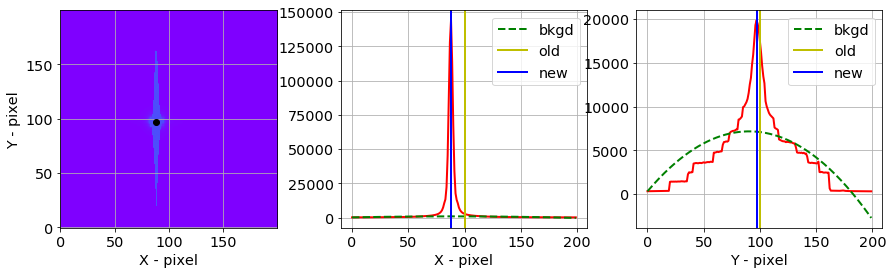

2018-03-29 11:21:28  Image      find_target          INFO   
	X,Y target position in pixels: 777.818,697.119
2018-03-29 11:21:28  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.74 vs -0.28


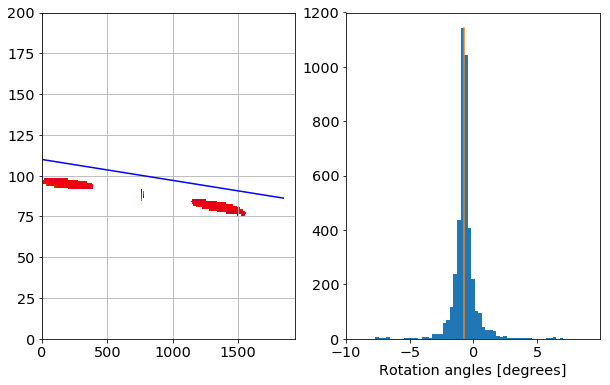

2018-03-29 11:21:28  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.74 degree


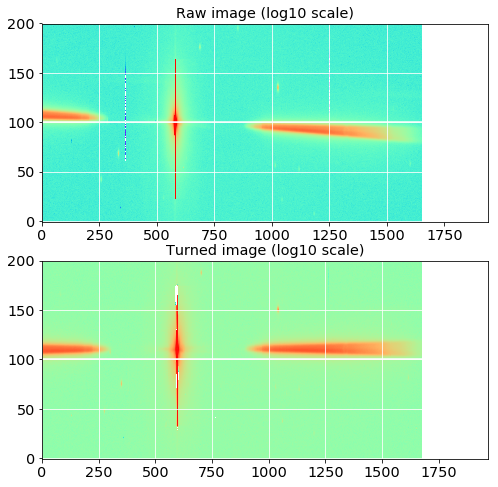

2018-03-29 11:21:31  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


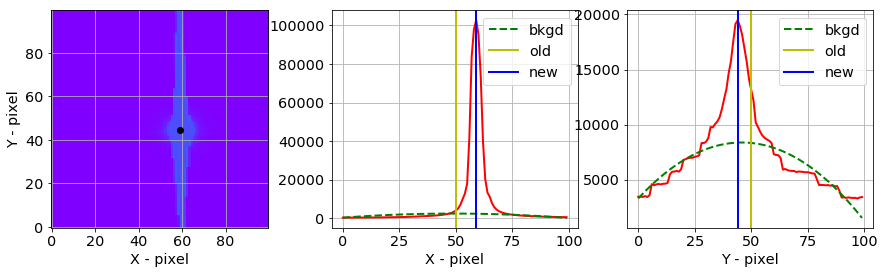

2018-03-29 11:21:32  Image      find_target          INFO   
	X,Y target position in pixels: 794.866,707.291
2018-03-29 11:21:32  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 11:21:32  Spectrum   __init__             INFO   
	Spectrum info copied from Image


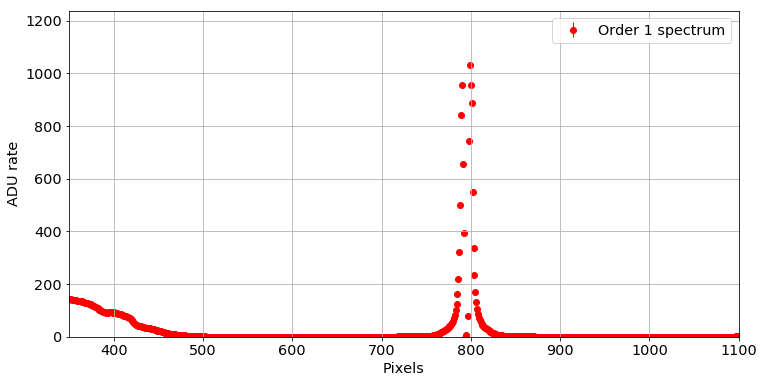

2018-03-29 11:21:32  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...


NameError: global name 'fit_bgd' is not defined

In [113]:
for index, row in filex0y0dxdy.iterrows():
    full_filename=os.path.join(inputdir,row['file'])
    x0,y0=row['Obj-posXpix'], row['Obj-posYpix']
    print 'spectrum ',index
    Spectractor(full_filename,outputdir,[x0,y0],object_name)